# Chapter 1: 

## Supervised Learning  with Classification Method

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# 1. Load the data (Make sure the CSV file is in the same folder as your notebook)
# Replace 'telecom_churn.csv' with the actual filename you downloaded
churn_df = pd.read_csv('telecom_churn_clean.csv') 

# 2. Extract features and target (The code from your image)
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

print(f"X shape: {X.shape}, y shape: {y.shape}")

# 3. Initialize and Fit the model (The next logical steps)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

print("Model fitted successfully!")

X shape: (3333, 2), y shape: (3333,)
Model fitted successfully!


### K-Nearest Neighbors: Predict

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

In [5]:
import numpy as np
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 1]


### Accuracy: Measuring Model Performance 

accuracy = correct predictions / total observations

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))


0.872


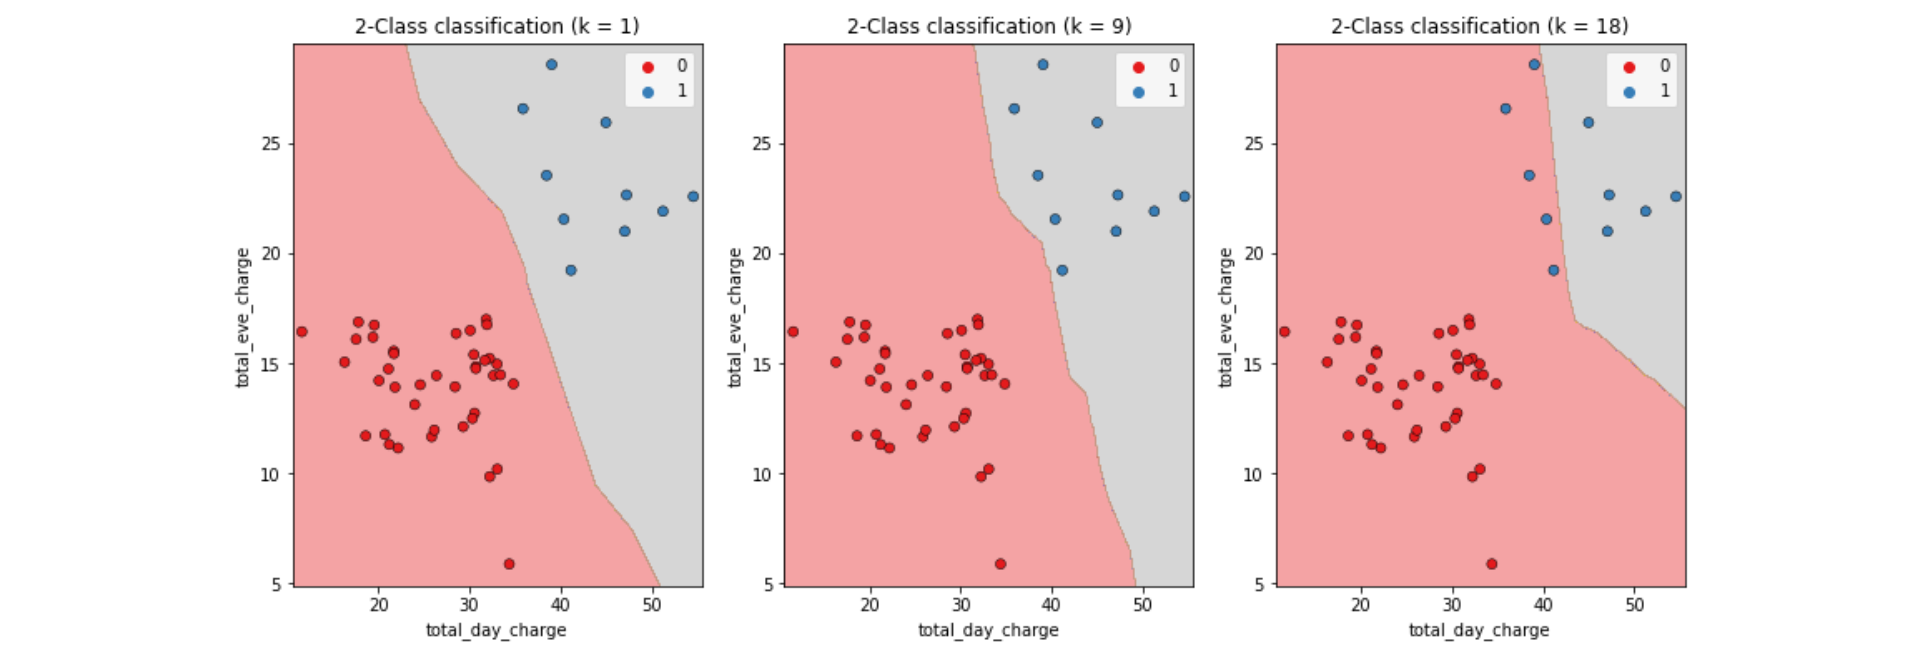

### Model complexity and Under / Over Fitting

In [7]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    


### Plotting Result

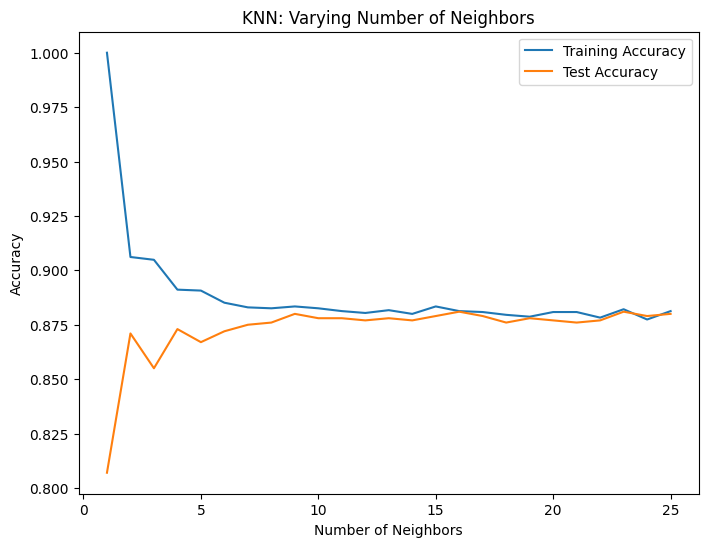

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()



# Chapter 2: 
## Supervised Learning with Regression Method

### Predicting Glucose level of Women with number of Pregnencies


In [9]:
import pandas as pd
diabeties_df = pd.read_csv("diabetes_clean.csv")
print(diabeties_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


### Creating feature and target variables


In [10]:
X = diabeties_df.drop("glucose", axis=1).values
y = diabeties_df['glucose'].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Making predictions from a single feature

In [11]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)


(768,) (768,)


In [12]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768, 1)


### Plotting Glucose vs Body Mass Index (BMI)

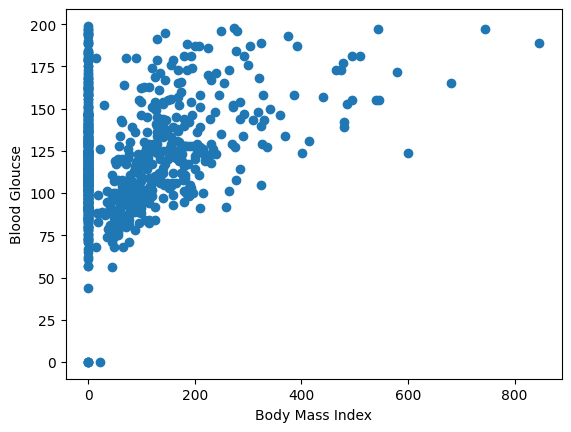

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Gloucse")
plt.xlabel("Body Mass Index")
plt.show()

### Fitting a Regression Model

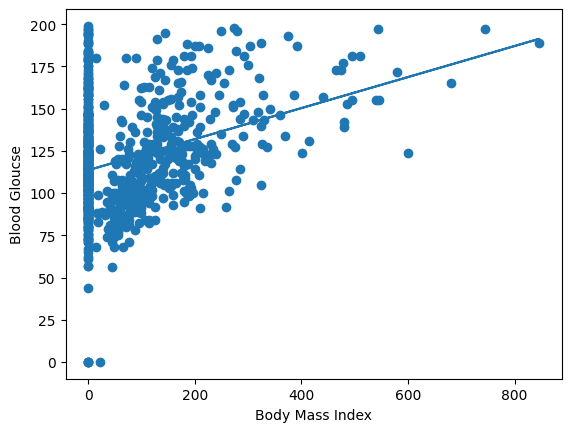

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)

predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Gloucse")
plt.xlabel("Body Mass Index")
plt.show()

### Working on Advertising and Sales Dataset


In [15]:
import numpy as np
import pandas as pd

sales_df = pd.read_csv('advertising_and_sales_clean.csv')

# Create X from the radio column's values
X = sales_df["radio"].values
# X = sales_df.drop("sales", axis=1).values
# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X, y)

predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


### Visualizing a linear regression model

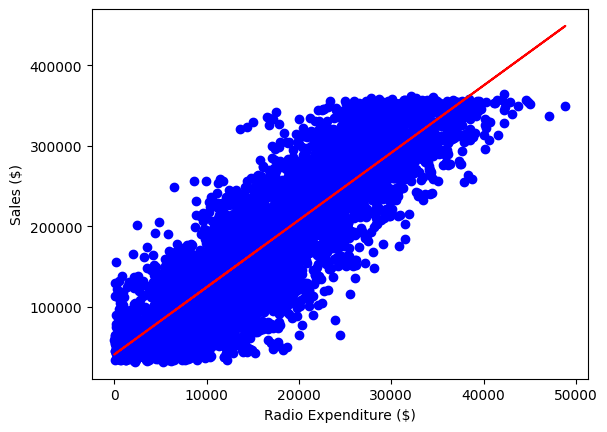

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="blue")

plt.plot(X, predictions, color="red")

plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

plt.show()

### The basics of Linear Regression

`y = ax + b`

- Simple linear regression uses one feature.
    - y = target
    - x = single feature
    - a,b = parameters/coefficients of the model

### Linear Regression using All Features

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

In [19]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)


45879.42086239429

the model has an average era for blood gloucose level of around the above value..

In [20]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
sales_df = pd.read_csv("advertising_and_sales_clean.csv")

# -----------------------------
# Convert categorical column
# -----------------------------

# One-hot encode the influencer column
sales_df = pd.get_dummies(sales_df, columns=["influencer"], drop_first=True)

# -----------------------------
# Create X and y
# -----------------------------

X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

# -----------------------------
# Split data
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Train model
# -----------------------------

reg = LinearRegression()
reg.fit(X_train, y_train)

# -----------------------------
# Predict
# -----------------------------

y_pred = reg.predict(X_test)

print("Predictions:", y_pred[:2])
print("Actual Values:", y_test[:2])


Predictions: [53135.43066453 71060.6004603 ]
Actual Values: [55261.28 67574.9 ]


In [21]:
# CHECK MODEL SCORE
from sklearn.metrics import r2_score

print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.9990150033349248


### Regression performance

In [22]:
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990150033349248
RMSE: 2944.7428499310217


### Cross Validation

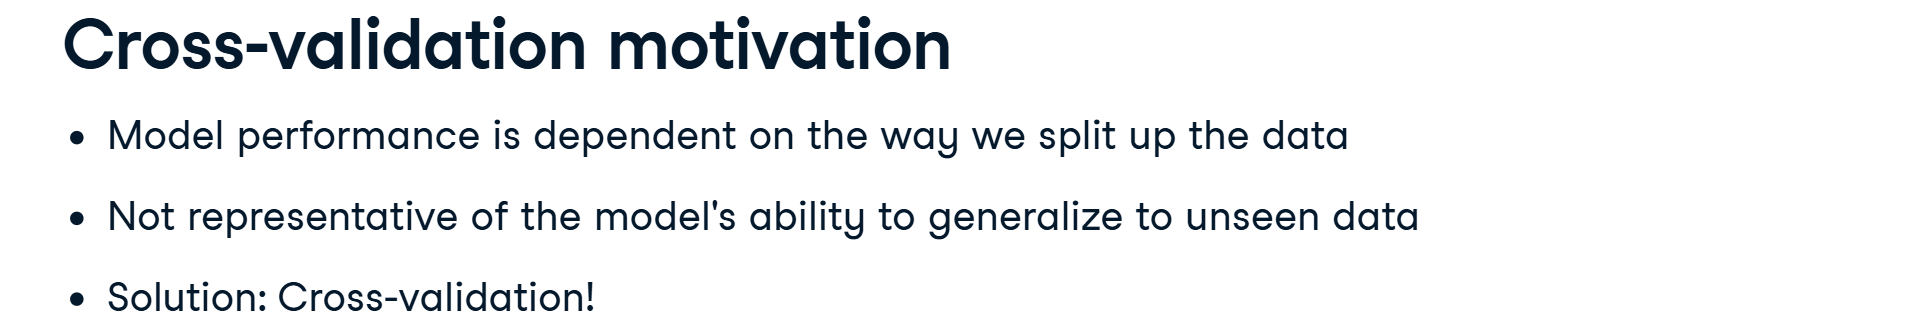

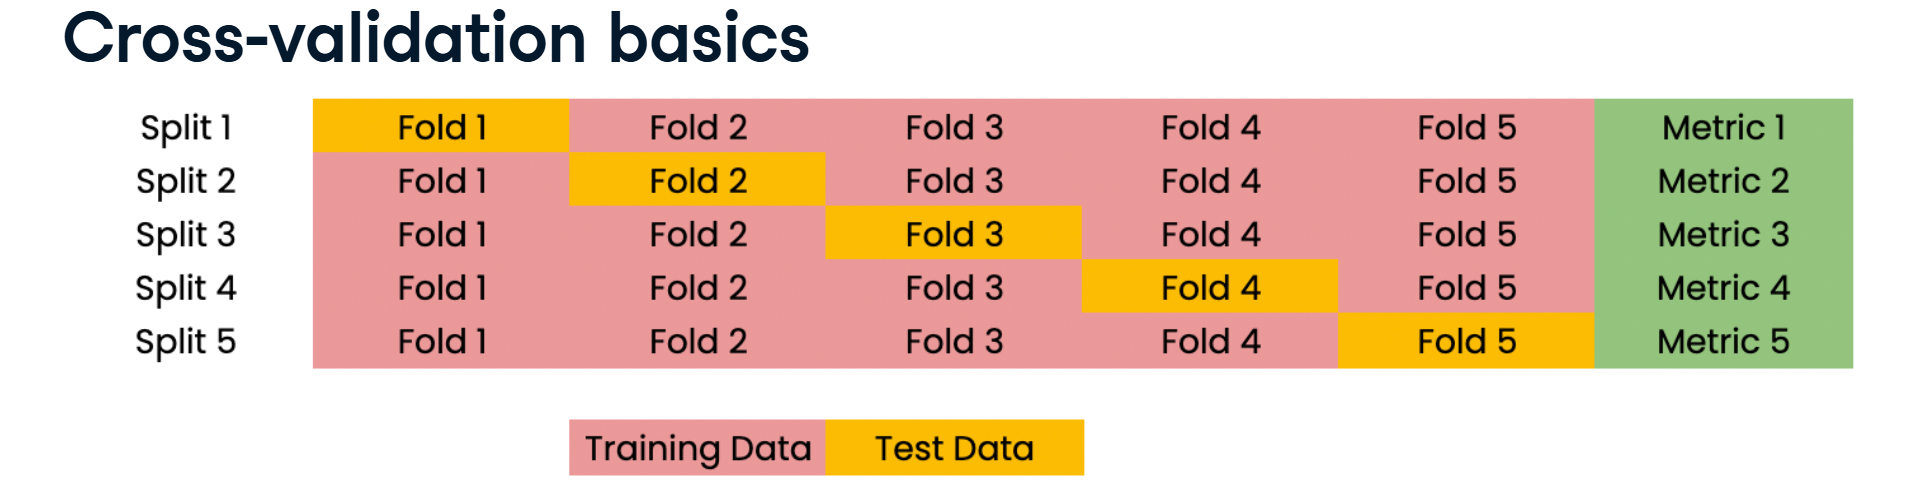

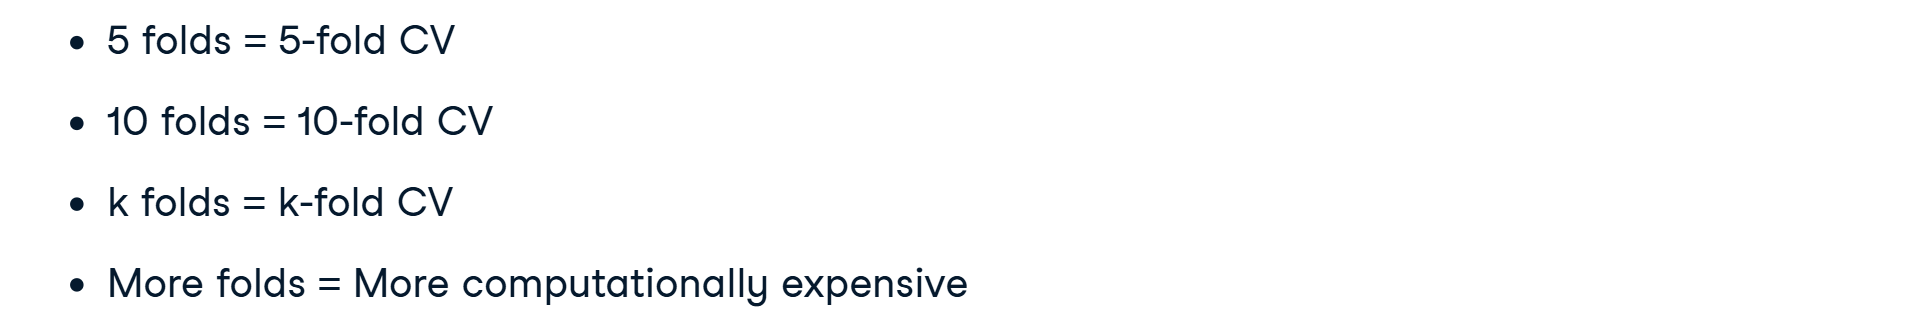

### Cross Validation in Scikit-learn

In [23]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [24]:
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.25, 0.975]))

[0.99900902 0.99898731 0.99896881 0.99898621 0.99892599 0.99905996]
0.9989895503853368 4.045978667092115e-05
[0.99897316 0.99905359]


### Regularized Regression
Regularized regression is a way to prevent overfitting in machine learning models.

Overfitting happens when:
- The model learns the training data too perfectly
- It also learns noise or small details
- Then it performs poorly on new data

Regularization = “Don’t make the model too complicated.”

It helps:
- Improve prediction accuracy
- Avoid memorizing data
- Make the model more reliable in real-world situations

### Ridge vs Lasso Regression
- Both are types of regularized regression.
- Both help prevent overfitting.
- The difference is how they penalize the model.


🟢 Ridge Regression (L2 Regularization)
What it does:
- Shrinks coefficients (makes them smaller)
- But never makes them exactly zero

👉 It keeps all features in the model
👉 Just reduces their impact

Simple idea:
- “Everyone stays in the team, but with smaller influence.”

When to use:
- When most features are useful
- When features are correlated



🔵 Lasso Regression (L1 Regularization)
What it does:
- Shrinks coefficients
- Can make some coefficients exactly zero

👉 It removes unimportant features
👉 Performs feature selection automatically

Simple idea:
- “Remove weak players from the team.”

When to use:
- When you have many features
- When you want automatic feature selection
- When some features may not be important

## Ridge Regression in Scikit-learn

In [25]:
from sklearn.linear_model import Ridge
scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
    
print(scores)
    

[0.9990150033784768, 0.9990150037697175, 0.9990150076129891, 0.9990150407484745, 0.9990151623295044]


### Lasoo Regression in Scikit-learn

In [26]:
from sklearn.linear_model import Lasso

scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
    
print(scores)

[0.9990150036406447, 0.9990150321081286, 0.999015149432897, 0.9990152111033483, 0.9990152120375869]


### Lasso for Feature Selection in Scikit-learn

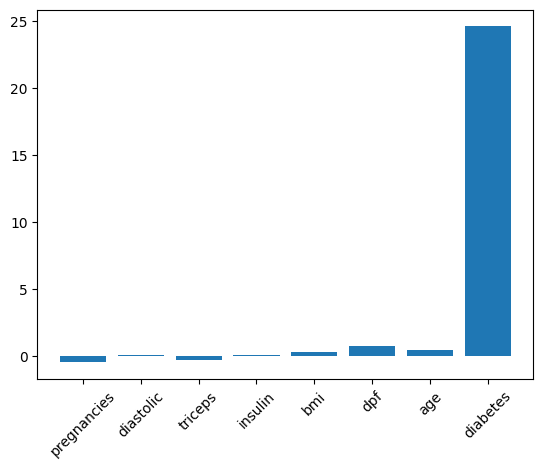

In [27]:
from sklearn.linear_model import Lasso
import pandas as pd

diabeties_df = pd.read_csv("diabetes_clean.csv")

X = diabeties_df.drop("glucose", axis=1).values
y = diabeties_df["glucose"].values

names = diabeties_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# Chapter 3 

## Fine-Tuning Your Model

Having trained models, now you will learn how to evaluate them. In this chapter, you will be introduced to several metrics along with a visualization technique for analyzing classification model performance using scikit-learn. You will also learn how to optimize classification and regression models through the use of hyperparameter tuning.



## 🔹 Assessing Classification Performance

When we build a classification model (like fraud detection), we want to check:

👉 How good are the predictions?
- We do this using a Confusion Matrix.

## 🔹 Understanding the Confusion Matrix (Fraud Example)

We have two classes:
- Legitimate (Not Fraud) → Negative class
- Fraudulent → Positive class

The matrix compares:
- Actual value (real answer)
- Predicted value (model’s guess)


The 4 Possible Outcomes
1️⃣ True Negative (TN)
- Actual: Legitimate
- Predicted: Legitimate
- ✅ Model was correct.


2️⃣ True Positive (TP)
- Actual: Fraud
- Predicted: Fraud
- ✅ Model correctly caught fraud.


3️⃣ False Positive (FP)
- Actual: Legitimate
- Predicted: Fraud
- ❌ Model falsely accused a normal transaction.
This is also called:
Type I Error


4️⃣ False Negative (FN)
- Actual: Fraud
- Predicted: Legitimate
- ❌ Model missed fraud.
This is also called:
Type II Error

🔹 Why This Matters in Fine-Tuning
In fine-tuning (like GridSearchCV, adjusting hyperparameters), we don’t just care about accuracy.

Because:
- In fraud detection, missing fraud (FN) is very bad.
- In medical diagnosis, missing disease (FN) is dangerous.
- In spam detection, false positives may be annoying.
So instead of just accuracy, we use better metrics.

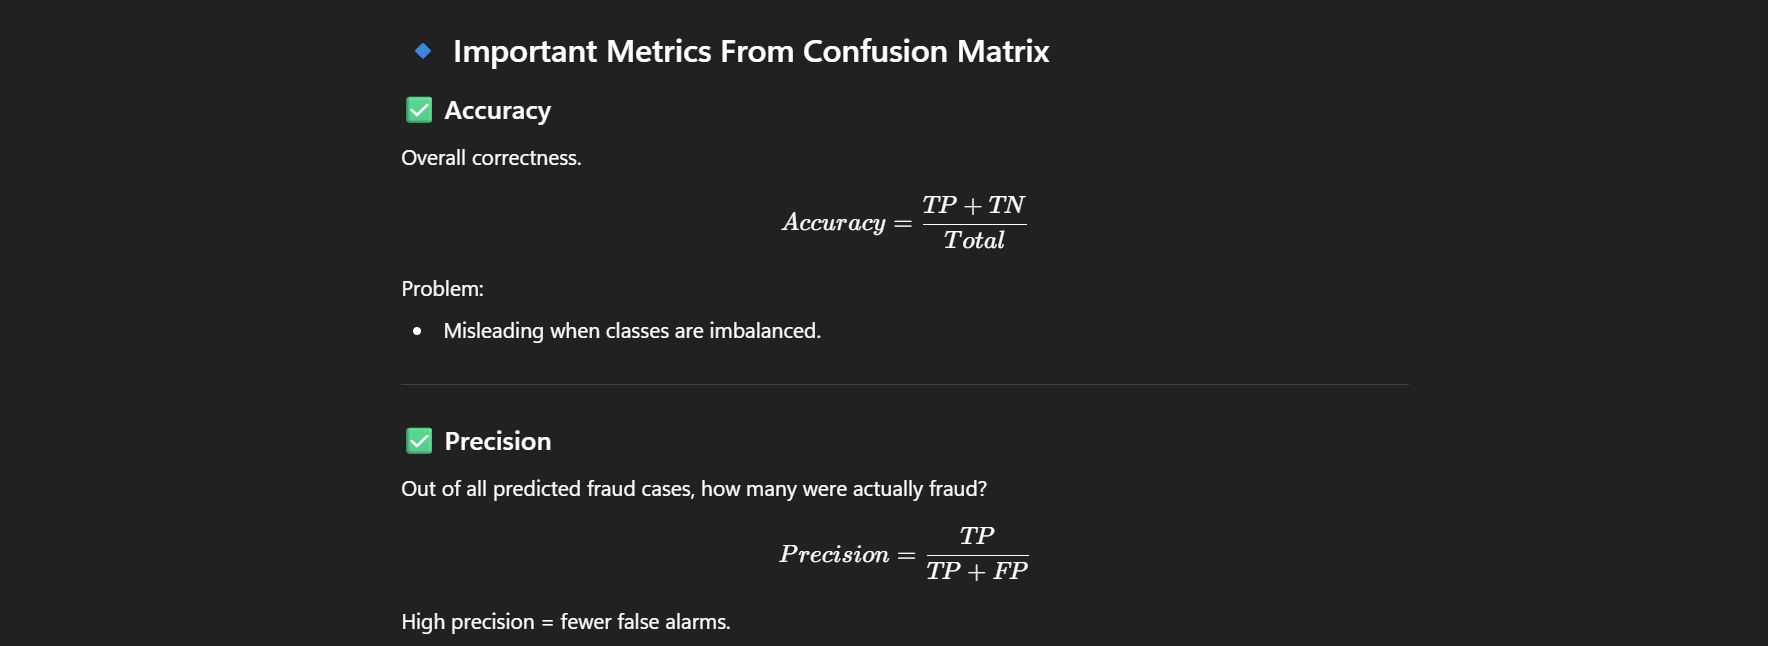
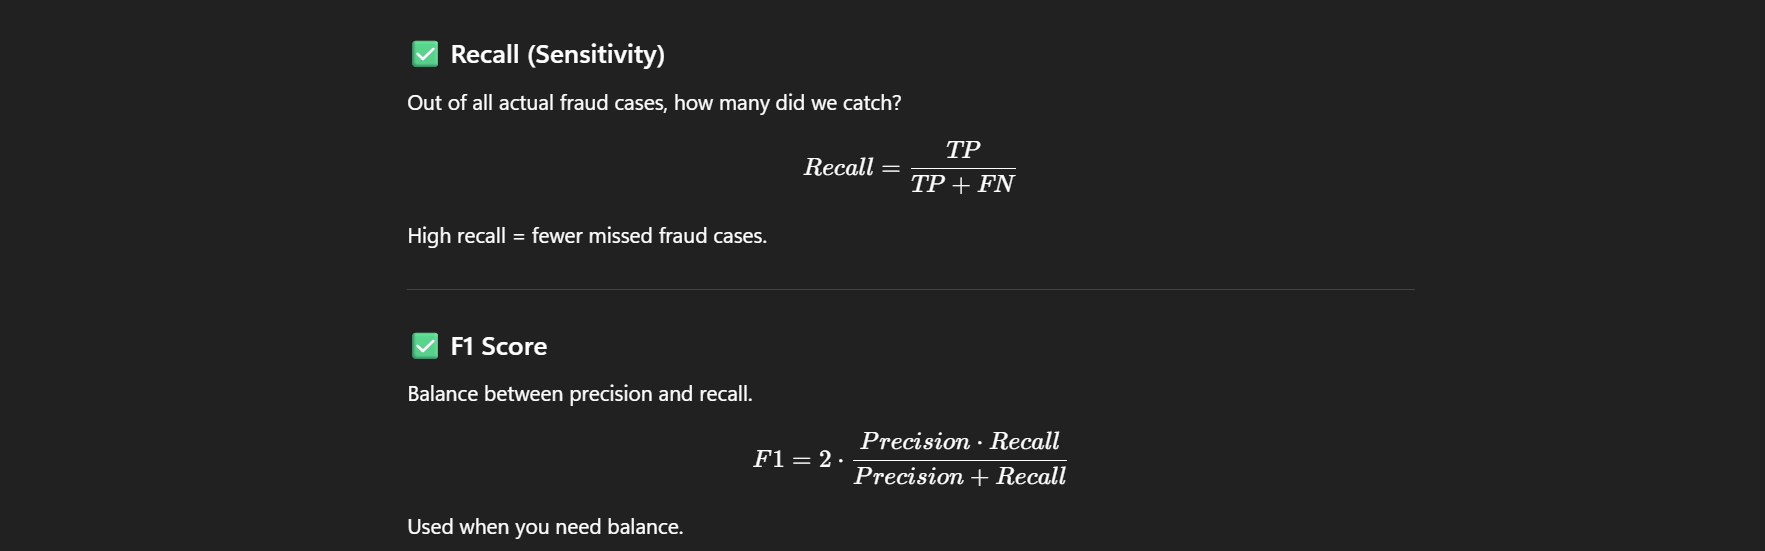

To Remember
Confusion Matrix gives 4 outcomes:

TP → Correct positive

TN → Correct negative

FP → False alarm

FN → Missed positive

### Confusion matric in Scikit-learn using Telecom Churn Dataset

In [28]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# 1. Load the data (Make sure the CSV file is in the same folder as your notebook)
# Replace 'telecom_churn.csv' with the actual filename you downloaded
churn_df = pd.read_csv('telecom_churn_clean.csv') 

# 2. Extract features and target (The code from your image)
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

print(f"X shape: {X.shape}, y shape: {y.shape}")

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



X shape: (3333, 2), y shape: (3333,)


In [29]:
print(confusion_matrix(y_test, y_pred))

[[1111   27]
 [ 142   54]]


1111 True Negatives

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



### Assessing a diabetes prediction classifier

Assessing a diabetes prediction classifier
In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into X_train, X_test, y_train, and y_test. In addition, a KNeighborsClassifier() has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

In [32]:
# 1️⃣ Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 2️⃣ Load the dataset
diabetes_df = pd.read_csv("diabetes_clean.csv")

# 3️⃣ Select Features and Target
X = diabetes_df[["bmi", "age"]]
y = diabetes_df["diabetes"]

# 4️⃣ Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5️⃣ Create and train KNN model
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# 6️⃣ Make predictions
y_pred = knn.predict(X_test)

# 7️⃣ Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[116  35]
 [ 47  33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



### Logistic regression and the ROC curve

This lesson introduces logistic regression, a key tool for classification tasks like predicting whether someone has a condition or not. Understanding how to evaluate its performance helps you build more reliable models for real-world decisions.

### 1. What is Logistic Regression?
Imagine you are trying to predict if an email is Spam or Not Spam.

Linear Regression tries to predict a continuous number (like a house price).

Logistic Regression predicts the probability that an input belongs to a certain class (e.g., "There is an 85% chance this is spam").

Instead of a straight line, it uses a special "S-shaped" curve called the Sigmoid Function. This function takes any number and squashes it into a range between 0 and 1.
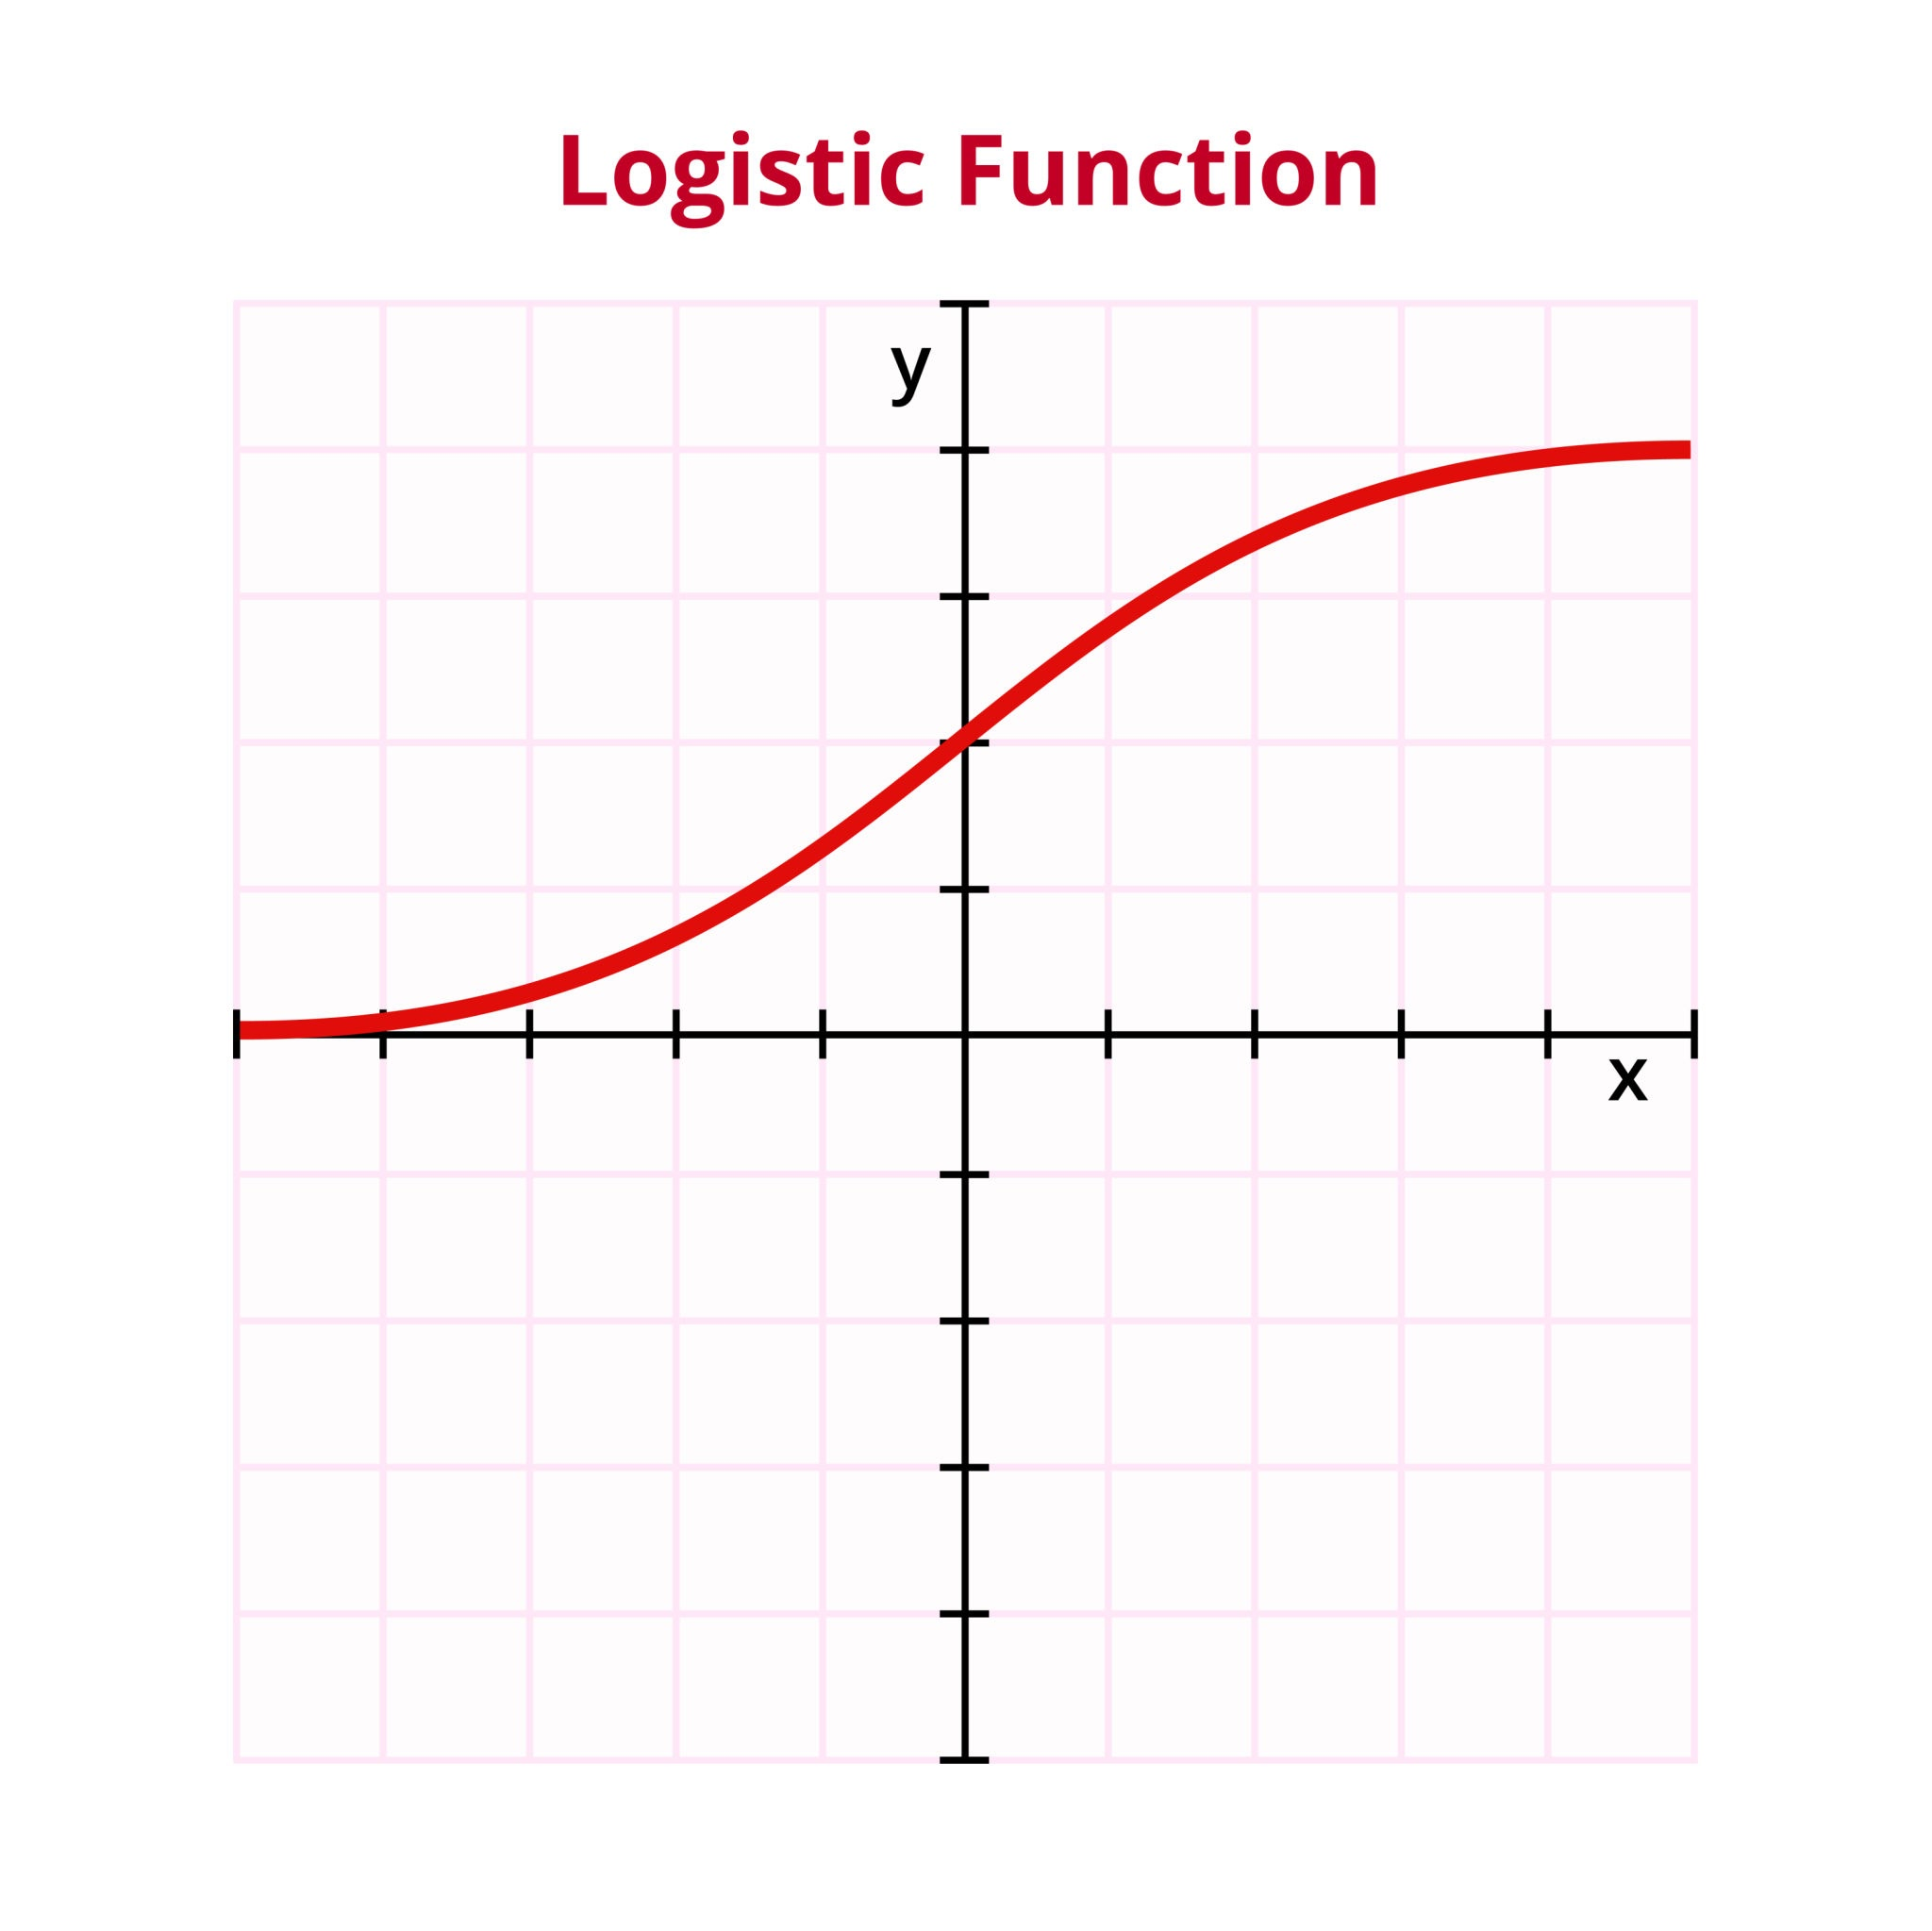


#### Advantages:
- Simple and Fast: It doesn’t require massive computing power.

- Interpretability: You can easily see which features (like specific words in an email) are the strongest predictors.

- Probability Scores: It doesn't just give a "Yes/No"; it tells you how confident it is.

### The ROC Curve: How good is your model?
When you use Logistic Regression, the model gives a probability. To make a final decision, you set a threshold (usually 0.5). If the probability is > 0.5, it’s "Spam."

But what if you change that threshold? That's where the ROC (Receiver Operating Characteristic) Curve comes in. It plots two things against each other as you vary that threshold:

1. True Positive Rate (Sensitivity): Out of all the actual spam emails, how many did we catch?

2. False Positive Rate: Out of all the good emails, how many did we accidentally label as spam?

Why it matters:
- The ROC curve helps you visualize the trade-off.

- In medicine, you might want a very low threshold because you don't want to miss a single sick patient (High Sensitivity), even if you get a few false alarms.

- In legal settings, you might want a high threshold because you’d rather let a guilty person go than convict an innocent one.


### The AUC (Area Under the Curve)
The ROC curve is a picture, but AUC is the number that summarizes it.

- AUC = 1.0: The perfect model. It separates classes perfectly.

- AUC = 0.5: The model is as good as guessing at random (like flipping a coin).

- AUC > 0.8: Generally considered a very good model.

### Building a logistic regression model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 1. Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# --- Load and Prepare Data ---
df = pd.read_csv('diabetes_clean.csv')

X = df.drop("diabetes", axis=1)  # Features
y = df["diabetes"]               # Target

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Instantiate the model
logreg = LogisticRegression(max_iter=1000)

# 3. Fit the model
logreg.fit(X_train, y_train)

# 4. Predict probabilities
# We use [:, 1] to get the probability of the POSITIVE class (having diabetes)
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# View the first 10 predictions
print("First 10 Predicted Probabilities:")
print(y_pred_probs[:10])

First 10 Predicted Probabilities:
[0.2758698  0.18843781 0.11448335 0.16354256 0.47152382 0.44181378
 0.01545858 0.66077384 0.54146156 0.77732996]


### The ROC Curve

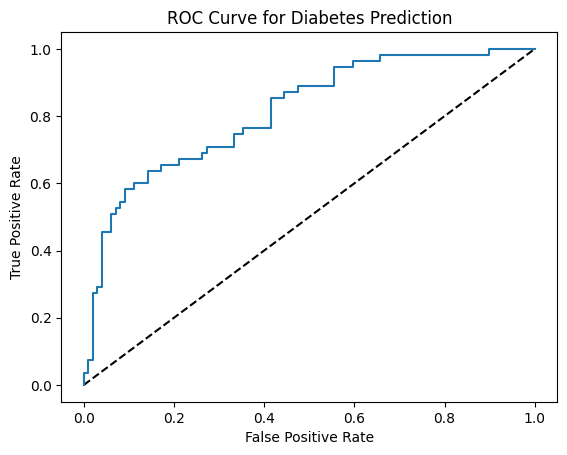

In [34]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()